In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
panda = pd.read_excel("lp2.xlsx")
pd1 = (panda['position']).dropna().to_list()
pd2 = panda[["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]].dropna()
arr = np.array(pd2).flatten().reshape(47,90)
df = pd.DataFrame(arr)
df['position'] = pd1
df.to_csv("second_dataset.csv")

In [117]:
df = pd.read_csv('second_dataset.csv')
# split into X and Y
X = df.drop(['position'], axis=1)
Y = df['position']

# convert to numpy arrays
X = np.array(X)

(array([20.,  0.,  7.,  0.,  0.,  6.,  0.,  5.,  0.,  9.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

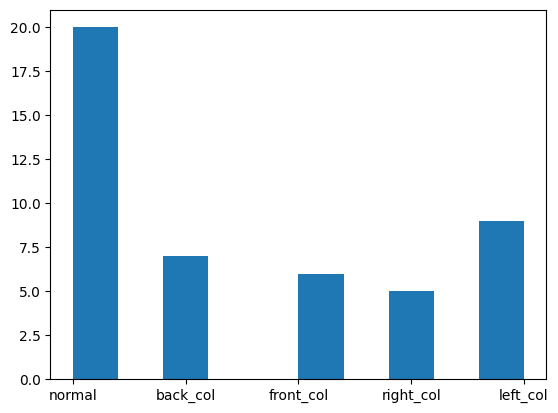

In [118]:
plt.hist(df['position'])

In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.2)

Naive Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.20)
scaler = StandardScaler()
scaler.fit(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [136]:
df["position"] = (df["position"] == "normal").astype(int)
df["position"] = (df["position"] == "back_col").astype(int)
df["position"] = (df["position"] == "left_col").astype(int)
df["position"] = (df["position"] == "front_col").astype(int)
df["position"] = (df["position"] == "right_col").astype(int)

In [137]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    back_col       0.33      1.00      0.50         1
   front_col       0.00      0.00      0.00         1
    left_col       1.00      0.33      0.50         3
      normal       0.80      1.00      0.89         4
   right_col       0.00      0.00      0.00         1

    accuracy                           0.60        10
   macro avg       0.43      0.47      0.38        10
weighted avg       0.65      0.60      0.56        10



C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

Randomforest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.20)
scaler = StandardScaler()
scaler.fit(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [133]:
clf = RandomForestClassifier(n_estimators=3, criterion='gini')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [134]:
cross_val_score(clf, x_train, y_train)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    back_col       0.50      0.50      0.50         2
   front_col       0.00      0.00      0.00         1
    left_col       0.00      0.00      0.00         0
      normal       1.00      1.00      1.00         6
   right_col       0.00      0.00      0.00         1

    accuracy                           0.70        10
   macro avg       0.30      0.30      0.30        10
weighted avg       0.70      0.70      0.70        10



C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `ze

In [37]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 7, 0],
       [0, 1, 0, 0, 0]], dtype=int64)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.20)

KNN model

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
df["position"] = (df["position"] == "normal").astype(int)
df["position"] = (df["position"] == "back_col").astype(int)
df["position"] = (df["position"] == "left_col").astype(int)
df["position"] = (df["position"] == "front_col").astype(int)
df["position"] = (df["position"] == "right_col").astype(int)

In [160]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    back_col       0.00      0.00      0.00         1
   front_col       0.50      0.50      0.50         2
    left_col       0.50      0.50      0.50         2
      normal       0.83      1.00      0.91         5

    accuracy                           0.70        10
   macro avg       0.46      0.50      0.48        10
weighted avg       0.62      0.70      0.65        10



C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

Artifical neural network

In [171]:
Y.head()

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [172]:
scaler = StandardScaler()
scaler.fit(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [173]:
x_train, x_test, y_train, y_test = train_test_split(X, dummy_y , test_size=0.20)

In [178]:
# build a model
import tensorflow as tf
model = Sequential()
model.add(Dense(200, input_shape=(x_train.shape[1],), activation='relu'))# input shape is (features,)
model.add(Dense(5, activation='softmax'))


# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

In [179]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=200, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=0)

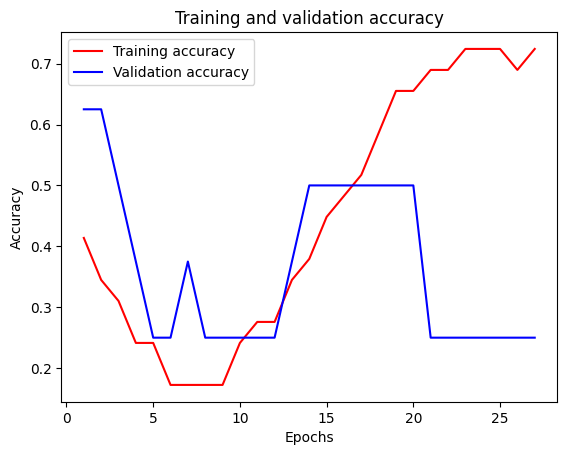

In [180]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [181]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(x_test) # see how the model did!
print(y_pred[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(y_pred[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y


# more detail on how well things were predicted
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

1/1 [==============================] - 0s 43ms/step
[9.9999654e-01 3.2181025e-10 3.4555603e-06 6.6278124e-13 5.5538446e-13]
1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.33      0.50         3
           2       1.00      1.00      1.00         1
           3       0.33      1.00      0.50         2
           4       1.00      1.00      1.00         1

    accuracy                           0.50        10
   macro avg       0.67      0.67      0.60        10
weighted avg       0.57      0.50      0.45        10



In [115]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix


array([[0, 1, 0, 0],
       [0, 3, 0, 0],
       [0, 2, 2, 0],
       [0, 0, 2, 0]], dtype=int64)